# _Exploration of Customer Purchasing Behavior_

#Importing Libraries

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import logging
from statsmodels.distributions.empirical_distribution import ECDF


#set logging

In [382]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()


#seaborn style for better visual

In [383]:
sns.set(style='whitegrid')

#loading dataset

In [384]:
train = pd.read_csv("C:/Users/vipin/OneDrive/Documents/Desktop/Project6/rossmann-store-sales/train.csv", low_memory=False)
test = pd.read_csv("C:/Users/vipin/OneDrive/Documents/Desktop/Project6/rossmann-store-sales/test.csv")
store = pd.read_csv("C:/Users/vipin/OneDrive/Documents/Desktop/Project6/rossmann-store-sales/store.csv")

#displaying some rows of above dataset

In [385]:
logger.info('Train Data Overview')
train.head()

2024-11-02 23:04:19,587 - INFO - Train Data Overview


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [386]:
logger.info('Test Data Overview')
test.head()

2024-11-02 23:04:19,640 - INFO - Test Data Overview


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [387]:
logger.info('Store Data Overview')
store.head()

2024-11-02 23:04:19,702 - INFO - Store Data Overview


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#Merge_dataset

In [388]:
train = pd.merge(train, store, on='Store', how='left')
test = pd.merge(test, store, on='Store', how='left')

In [389]:
logger.info(f'Merged Train Data Shape: {train.shape}')
logger.info(f'Merged Test Data Shape: {test.shape}')

2024-11-02 23:04:20,306 - INFO - Merged Train Data Shape: (1017209, 18)
2024-11-02 23:04:20,312 - INFO - Merged Test Data Shape: (41088, 17)


#finding_missing-values

In [390]:
logger.info(f'Missing Values in Train:\n{train.isnull().sum()}')

2024-11-02 23:04:21,160 - INFO - Missing Values in Train:
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


In [391]:
logger.info(f'Missing Values in Test:\n{test.isnull().sum()}')

2024-11-02 23:04:21,258 - INFO - Missing Values in Test:
Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64


#filling_missing-value

In [392]:
test['Open'].fillna(test['Open'].median(), inplace=True)

C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\3114663933.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Open'].fillna(test['Open'].median(), inplace=True)


# Converting 'Date' column to datetime format

In [393]:

train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

## Extract date features

In [394]:

train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['WeekOfYear'] = train['Date'].dt.isocalendar().week
train['DayOfWeek'] = train['Date'].dt.dayofweek
train['IsWeekend'] = train['DayOfWeek'] >= 5  # Saturday and Sunday

In [395]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,IsWeekend
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,31,False
1,2,4,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,False
2,3,4,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,False
3,4,4,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,False
4,5,4,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,31,False


In [396]:
train = train[["Store","Date","Day","Month","Year","DayOfWeek","WeekOfYear","Sales","Customers","Open","Promo","StateHoliday","SchoolHoliday"]]

In [397]:
train.head()

,Store,Date,Day,Month,Year,DayOfWeek,WeekOfYear,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2015-07-31,31,7,2015,4,31,5263,555,1,1,0,1
1,2,2015-07-31,31,7,2015,4,31,6064,625,1,1,0,1
2,3,2015-07-31,31,7,2015,4,31,8314,821,1,1,0,1
3,4,2015-07-31,31,7,2015,4,31,13995,1498,1,1,0,1
4,5,2015-07-31,31,7,2015,4,31,4822,559,1,1,0,1


StateHoliday

In [398]:
train["StateHoliday"].value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [399]:
train.loc[:, "StateHoliday"] = train["StateHoliday"].replace({0: "o", "0": "o"})


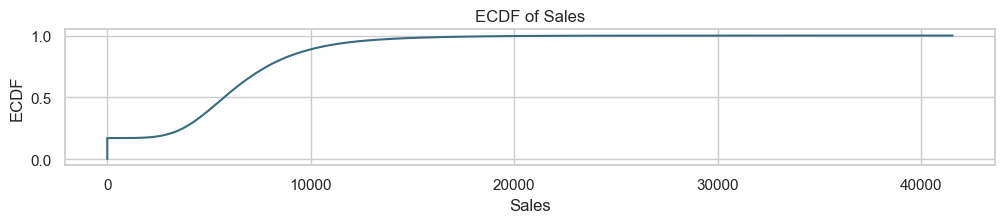

In [400]:
plt.figure(figsize=(12, 6))
plt.subplot(311)
cdf_sales = ECDF(train['Sales'])
plt.plot(cdf_sales.x, cdf_sales.y, label="Sales ECDF", color='#386B7F')
plt.xlabel('Sales')
plt.ylabel('ECDF')
plt.title('ECDF of Sales')
plt.show()

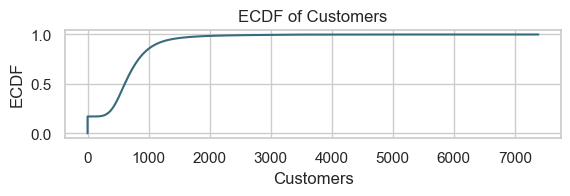

In [401]:
plt.subplot(312)
cdf_customers = ECDF(train['Customers'])
plt.plot(cdf_customers.x, cdf_customers.y, label="Customers ECDF", color='#386B7F')
plt.xlabel('Customers')
plt.ylabel('ECDF')
plt.title('ECDF of Customers')
plt.show()

About 20% of data has zero amount of sales / customers that we need to deal with and almost 80% of time daily amount of sales was less than 1000. So what about zero sales,let's dig deeper to know what was the cause. would it be because of closed stores or even state holiday's?

#closed stores and Zero sales stores

In [402]:

closed_stores = train[(train.Open == 0) & (train.Sales == 0)]
closed_rows = len(closed_stores)
total_rows = len(train)
closed_percentage = (closed_rows / total_rows) * 100

print(f"{closed_rows} rows, which is about {closed_percentage:.2f}% of the total observations, indicate stores that were closed and made no sales.")

# Drop closed store rows from the dataset
data_filtered = train[train['Open'] == 1]

172817 rows, which is about 16.99% of the total observations, indicate stores that were closed and made no sales.


172817 rows which is about 16.99% of the total observations indicate the numbers of stores that closed and made no sales at all due various reasons And since we don't want to bias model to consider those exceptions, the best solution here is to get rid of closed stores and prevent the models to train on them and get false guidance.

#Open stores and Zero sales stores

In [403]:

with_zero_sales = train[(train["Open"] != 0) & (train["Sales"] == 0)]#.head(5)
with_zero_sales.shape

(54, 13)

There're only 54 days in the data with no sales in working days(open), so we can assume that there were external factors involved, for example manifestations.

In [404]:
train = train[(train["Open"] != 0) & (train["Sales"] != 0)]

In [405]:
train.shape

(844338, 13)

Outliers

#Sales

In [406]:
train["Sales"].describe()

count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [407]:
logger.info('Extracted Date Features in Train:')

2024-11-02 23:04:25,546 - INFO - Extracted Date Features in Train:


# Exploratory Data Analysis

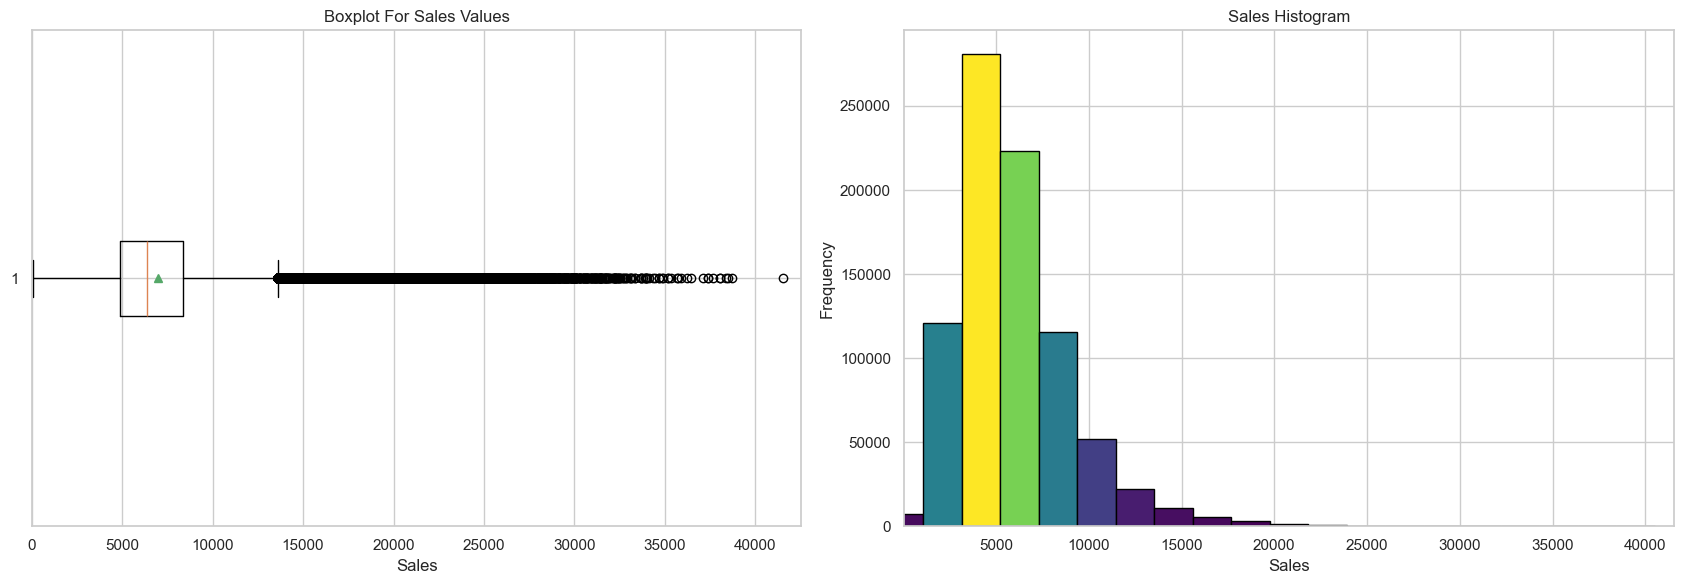

In [408]:
fig, axes = plt.subplots(1, 2, figsize=(17, 6))

# boxplot for Sales
axes[0].boxplot(train.Sales, showmeans=True, vert=False)
axes[0].set_xlim(0, max(train["Sales"]) + 1000)
axes[0].set_title('Boxplot For Sales Values')
axes[0].set_xlabel('Sales')

# Sales histogram
counts, bins = np.histogram(train.Sales, bins=20)

for count, x in zip(counts, bins[:-1]):
    color = plt.cm.viridis(count / max(counts))
    axes[1].bar(x, count, width=bins[1] - bins[0], color=color, edgecolor='black')

axes[1].set_title("Sales Histogram")
axes[1].set_xlim((min(train.Sales), max(train.Sales)))
axes[1].set_xlabel('Sales')
axes[1].set_ylabel('Frequency')

plt.tight_layout()

plt.savefig("Sales_outlier.png")

plt.show()

# Sales Distribution

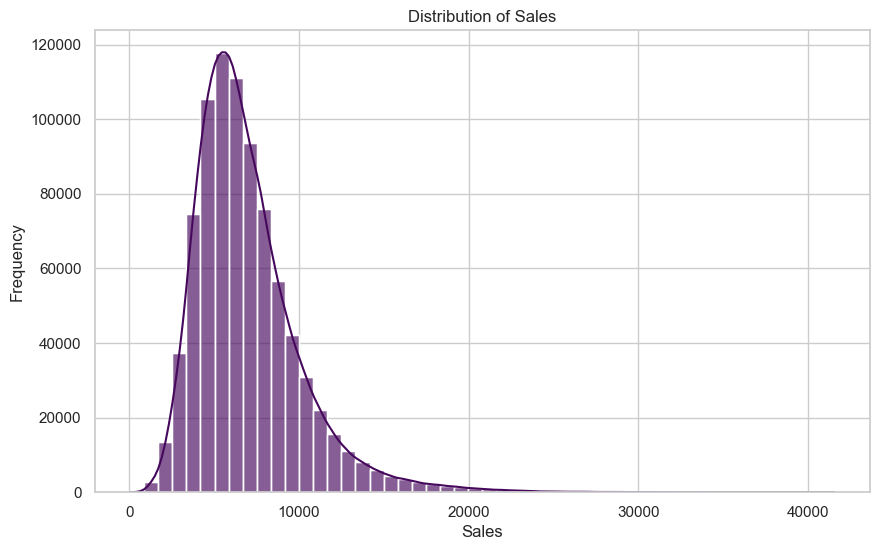

In [409]:
plt.figure(figsize=(10, 6))

#color palette
colors = sns.color_palette("viridis", n_colors=50)

#histogram with color gradient
sns.histplot(train[train['Sales'] > 0]['Sales'], bins=50, kde=True, color=colors[0])
sns.histplot(train[train['Sales'] > 0]['Sales'], bins=50, kde=False, color=colors[0], alpha=0.3)

plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Sales and Promotions

#Average Sales during Promo and non-Promo periods

In [410]:

promo_sales = train.groupby('Promo')['Sales'].mean()
logger.info(f'Average Sales with Promo: {promo_sales}')

2024-11-02 23:04:41,175 - INFO - Average Sales with Promo: Promo
0    5929.826183
1    8228.739731
Name: Sales, dtype: float64


#promotions on sales

2024-11-02 23:04:42,835 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-02 23:04:44,064 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


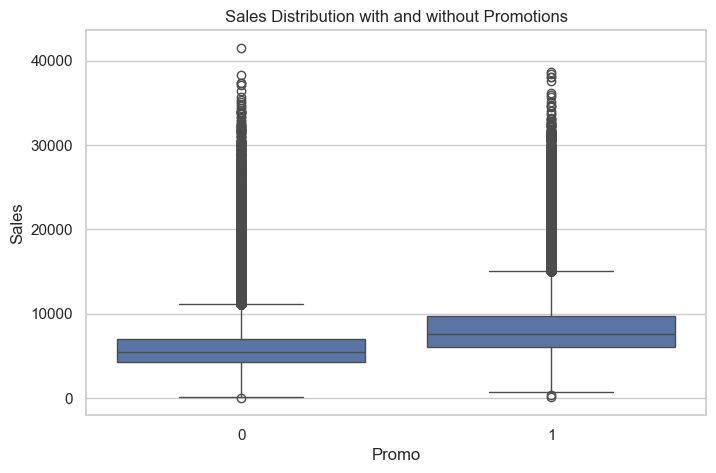

In [411]:

plt.figure(figsize=(8,5))
sns.boxplot(x='Promo', y='Sales', data=train[train['Sales'] > 0])
plt.title('Sales Distribution with and without Promotions')
plt.show()

# Sales During Holidays

C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\283994501.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='StateHoliday', y='Sales', data=train[train['Sales'] > 0],palette=colors)


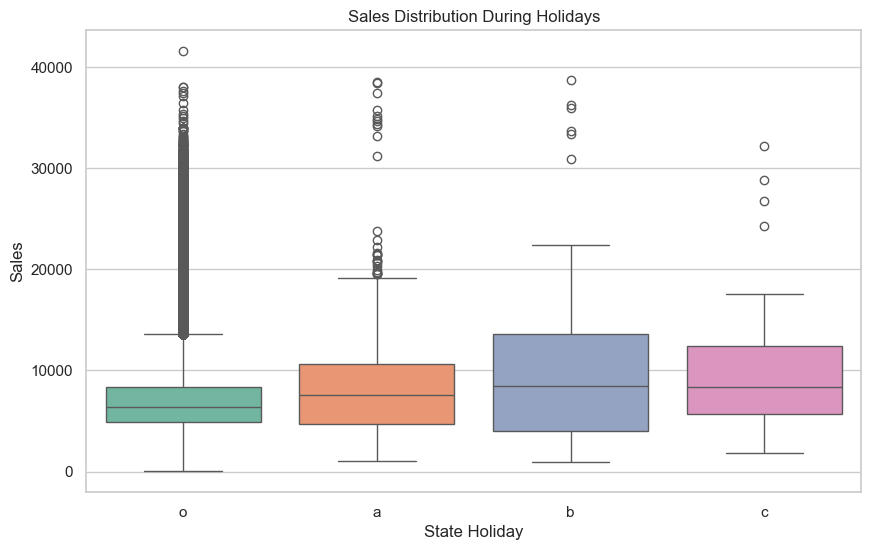

In [412]:
plt.figure(figsize=(10, 6))

unique_holidays = train['StateHoliday'].unique()
colors = sns.color_palette("Set2", n_colors=len(unique_holidays))

#boxplot with custom colors
sns.boxplot(x='StateHoliday', y='Sales', data=train[train['Sales'] > 0],palette=colors)

plt.title('Sales Distribution During Holidays')
plt.xlabel('State Holiday')
plt.ylabel('Sales')
plt.show()

Correlation Between Sales and Customers

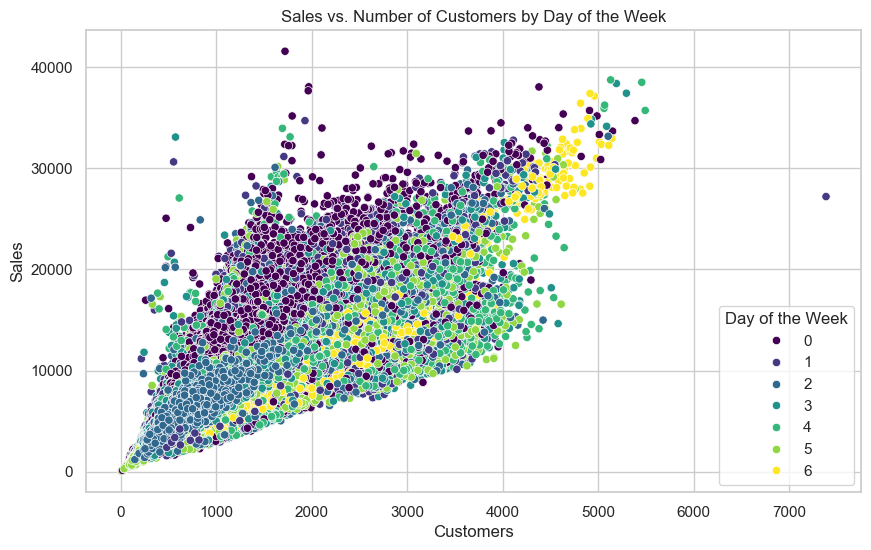

In [413]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', hue='DayOfWeek', palette='viridis', data=train[train['Sales'] > 0])
plt.title('Sales vs. Number of Customers by Day of the Week')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.legend(title='Day of the Week')
plt.show()

# Correlation coefficient

In [414]:

corr = train[['Sales', 'Customers']].corr()
logger.info(f'Correlation between Sales and Customers: {corr.iloc[0,1]}')

2024-11-02 23:06:00,077 - INFO - Correlation between Sales and Customers: 0.8235517202000244


Effect of Store Distance from Competitor

#satter plot with a color palette based on 'Store'

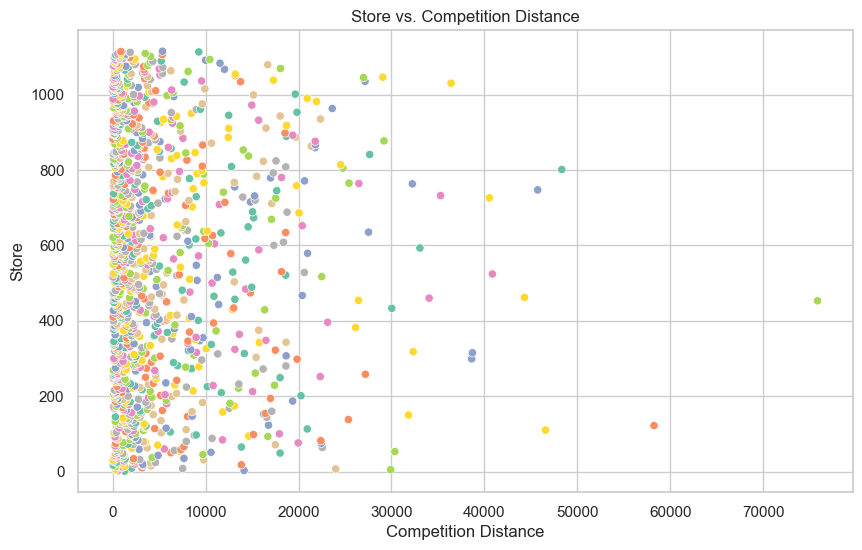

In [415]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='CompetitionDistance', y='Store', data=store[store['Store'] > 0], 
                hue='Store', palette='Set2', legend=False)

plt.title('Store vs. Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Store')
plt.show()

Handling Categorical Data

In [416]:
# Converting categorical columns to numerical
store['StoreType'] = store['StoreType'].astype('category').cat.codes
store['Assortment'] = store['Assortment'].astype('category').cat.codes


Store data set

In [417]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   int8   
 2   Assortment                 1115 non-null   int8   
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), int8(2), object(1)
memory usage: 72.0+ KB


In [418]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [419]:
store.shape

(1115, 10)

#checking for missing values

In [420]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

We have few variables with missing values that we need to deal with. Let's dive in!! CompetitionDistance

#missing values in CompetitionDistance

In [421]:
store[pd.isnull(store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,3,0,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,0,2,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,3,0,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


No particular pattern observed therefore it makes a complete sense to replace NaN with the median values. This case is pretty straighforward, all the missing values comes from fields where Promo2=0 which means there are no continuous promotional activities for those stores. Having no promotion means those fields have to be 0 as well since they are linked to Promo2.

In [422]:
# Computing the median
median_CompetitionDistance = store["CompetitionDistance"].median()

# Imputing the missing value in CompetitionDistance column without inplace
store.loc[:, "CompetitionDistance"] = store["CompetitionDistance"].fillna(median_CompetitionDistance)

# Checking if the column 'CompetitionDistance' has any missing values
store["CompetitionDistance"].isnull().sum()


0

In [423]:
store["CompetitionOpenSinceYear"].value_counts()

CompetitionOpenSinceYear
2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: count, dtype: int64

In [424]:

store["Promo2"].value_counts()

Promo2
1    571
0    544
Name: count, dtype: int64

In [425]:
store[["Promo2","Promo2SinceWeek",	"Promo2SinceYear","PromoInterval"]]

,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,NaN,NaN,NaN
1,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
...,...,...,...,...
1110,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,0,NaN,NaN,NaN
1112,0,NaN,NaN,NaN
1113,0,NaN,NaN,NaN


In [426]:

store[pd.isnull(store.Promo2SinceWeek)].head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,2,2,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,0,0,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,0,0,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,0,2,24000.0,4.0,2013.0,0,NaN,NaN,NaN


There is a pattern, there are null values in the column: Promo2SinceWeek,Promo2SinceYear,PromoInterval when Promo2 is 0(indicating the store did not participate),It is therefore wise to impute the missing values with zero.

In [427]:
# Filling missing values in specific columns using direct assignment with .loc[]
store.loc[:, 'Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)
store.loc[:, 'Promo2SinceYear'] = store['Promo2SinceYear'].fillna(0)
store.loc[:, 'PromoInterval'] = store['PromoInterval'].fillna(0)


In [428]:
# Filling missing values using .loc[] for direct assignment
store.loc[:, 'CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(0)
store.loc[:, 'CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(0)


TEST

In [429]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41088 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [430]:
test.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [431]:
test.shape

(41088, 17)

In [432]:
#checking for missing values
test.isnull().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                             0
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

In [433]:
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day
test['WeekOfYear'] = test['Date'].dt.isocalendar().week
test['DayOfWeek'] = test['Date'].dt.dayofweek
test['IsWeekend'] = test['DayOfWeek'] >= 5

In [434]:
test["Open"].value_counts()

Open
1.0    35104
0.0     5984
Name: count, dtype: int64

Most of the data shows that that the store was open, therefore we are going to impute the missing values with the mode, Open = 1.

In [435]:
test.loc[test.Open.isnull(), "Open"] = 1

In [436]:
test["Open"].isnull().sum()

0

In [437]:
test["StateHoliday"].value_counts()

StateHoliday
0    40908
a      180
Name: count, dtype: int64

StateHoliday. For comformity purposes with the train dataset, we convert have the 0 representing None to o. Therefore we will end up having a = public holiday, b = Easter holiday, c = Christmas, o = None

In [438]:
# Replacing "0" with "o" in the StateHoliday column using .loc[]
test.loc[:, 'StateHoliday'] = test['StateHoliday'].replace({"0": "o"})


In [439]:
# Fill missing values
test['CompetitionDistance'] = test['CompetitionDistance'].fillna(test['CompetitionDistance'].median())
test['Promo2SinceWeek'] = test['Promo2SinceWeek'].fillna(0)
test['Promo2SinceYear'] = test['Promo2SinceYear'].fillna(0)
test['PromoInterval'] = test['PromoInterval'].fillna('None')

In [440]:
train = pd.read_csv('C:/Users/vipin/OneDrive/Documents/Desktop/Project6/rossmann-store-sales/train.csv',  parse_dates=[2],index_col = 'Date')
store = pd.read_csv("C:/Users/vipin/OneDrive/Documents/Desktop/Project6/rossmann-store-sales/store.csv", low_memory = False)

train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['Dates']=train.apply(lambda x:'%s-%s-%s' % (x['Year'],x['Month'],x['Day']),axis=1)
train['Dates']=pd.to_datetime(train['Dates'])

train_store = pd.merge(train, store, how = 'inner', on = 'Store')

#data_frame = pd.read_csv("train.csv")
train = pd.read_csv('C:/Users/vipin/OneDrive/Documents/Desktop/Project6/rossmann-store-sales/train.csv',  parse_dates=[2],index_col = 'Date')
store = pd.read_csv("C:/Users/vipin/OneDrive/Documents/Desktop/Project6/rossmann-store-sales/store.csv",  low_memory = False)

train_store

C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\1284353496.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('C:/Users/vipin/OneDrive/Documents/Desktop/Project6/rossmann-store-sales/train.csv',  parse_dates=[2],index_col = 'Date')
C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\1284353496.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('C:/Users/vipin/OneDrive/Documents/Desktop/Project6/rossmann-store-sales/train.csv',  parse_dates=[2],index_col = 'Date')


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,6064,625,1,1,0,1,2015,7,...,2015-07-31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,1,0,1,2015,7,...,2015-07-31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,1,0,1,2015,7,...,2015-07-31,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,4822,559,1,1,0,1,2015,7,...,2015-07-31,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,a,1,2013,1,...,2013-01-01,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,0,0,0,0,a,1,2013,1,...,2013-01-01,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,0,0,0,0,a,1,2013,1,...,2013-01-01,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,0,0,0,0,a,1,2013,1,...,2013-01-01,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


 # Descriptive statistics are very useful for initial exploration of the variables
 # By default, only descriptives for the numerical variables are shown
 # To include the categorical ones, you should specify this with an argument
 # Note that categorical variables don't have some types of numerical descriptives
 # and numerical variables don't have some types of categorical descriptives

In [441]:
#Checkinig the missing values
train_store.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
Dates                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [442]:
train_store[pd.isnull(train_store.CompetitionDistance)].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,5,10052,973,1,1,0,1,2015,7,...,2015-07-31,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,5,6306,540,1,1,0,1,2015,7,...,2015-07-31,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,5,6000,466,1,1,0,0,2015,7,...,2015-07-31,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1405,291,4,9030,883,1,1,0,1,2015,7,...,2015-07-30,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1736,622,4,5412,406,1,1,0,1,2015,7,...,2015-07-30,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN


In [443]:
df_store_check_distribution=train_store.drop(train_store[pd.isnull(train_store.CompetitionDistance)].index)
df_store_check_distribution.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Dates,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,2015-07-31,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,6064,625,1,1,0,1,2015,7,...,2015-07-31,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,1,0,1,2015,7,...,2015-07-31,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,1,0,1,2015,7,...,2015-07-31,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,4822,559,1,1,0,1,2015,7,...,2015-07-31,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


{'Mean': 5430.085652302903,
 'Median': 2330.0,
 'Standard Dev': 7715.3198979951185}

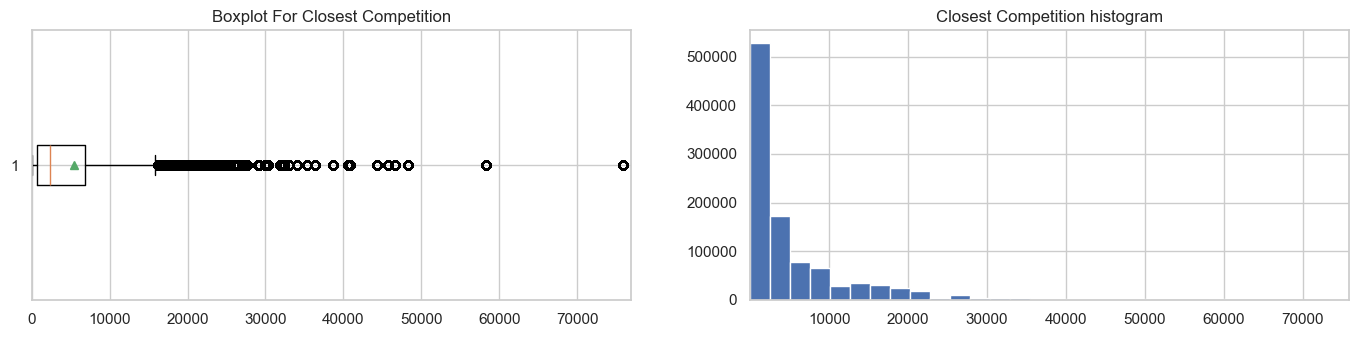

In [444]:
df_store_check_distribution=train_store.drop(train_store[pd.isnull(train_store.CompetitionDistance)].index)
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_store_check_distribution.CompetitionDistance, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df_store_check_distribution.CompetitionDistance+1000))
axes[0].set_title('Boxplot For Closest Competition')
axes[1].hist(df_store_check_distribution.CompetitionDistance, cumulative=False, bins=30)
axes[1].set_title("Closest Competition histogram")
axes[1].set_xlim((min(df_store_check_distribution.CompetitionDistance), max(df_store_check_distribution.CompetitionDistance)))
{"Mean":np.nanmean(train_store.CompetitionDistance),"Median":np.nanmedian(train_store.CompetitionDistance),"Standard Dev":np.nanstd(train_store.CompetitionDistance)}
#That's what i thought, very different values, let's see why 

We see a highly right skewed distribution for this variable with a significant difference between the mean and the median. This being caused by the amount of disperness in the data with a standard deviation of 7715.31, higher than the mean and the median.

**What do we do then?**

It is realistically better to input the median value to the Nan stores then the mean since the mean is biased by those outliers.

In [445]:
train_store['CompetitionDistance'].fillna(train_store['CompetitionDistance'].median(), inplace = True)

C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\3176651537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_store['CompetitionDistance'].fillna(train_store['CompetitionDistance'].median(), inplace = True)


__CompetitionOpenSinceMonth and CompetitionOpenSinceYear__

Since we have no information whatsoever on those missing values and no accurate way of filling those values.
So those fields are going to be assigned to 0 .

In [446]:
train_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
train_store.CompetitionOpenSinceYear.fillna(0,inplace=True)

C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\2942586964.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\2942586964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

__Promo2SinceWeek, Promo2SinceYear and PromoInterval__ 

This case is pretty straighforward, all the missing values comes from fields where Promo2=0 which means there are no continuous promotional activities for those stores.
Having no promotion means those fields have to be 0 as well since they are linked to Promo2.


In [447]:
train_store.Promo2SinceWeek.fillna(0,inplace=True)
train_store.Promo2SinceYear.fillna(0,inplace=True)
train_store.PromoInterval.fillna(0,inplace=True)


C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\1489404389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_store.Promo2SinceWeek.fillna(0,inplace=True)
C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\1489404389.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

__StateHoliday__


In [448]:
train_store.StateHoliday.fillna(0,inplace=True)

def percent_missing(df):
    return df.isnull().mean() * 100

missing_percentage = percent_missing(train_store)
print(missing_percentage)

C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\95008011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_store.StateHoliday.fillna(0,inplace=True)


Store                        0.0
DayOfWeek                    0.0
Sales                        0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
Year                         0.0
Month                        0.0
Day                          0.0
Dates                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64


In [449]:
train_store.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,Dates,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,2014-04-11 01:30:42.846061824,5.422034e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,2013-08-17 00:00:00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2014-04-02 00:00:00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,2014-12-12 00:00:00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,2015-07-31 00:00:00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,NaN,7.706913e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03


## Reading the description report 

Store: The Store ID ranges from 1 to 1115, with a mean of 558.43, indicating the middle value is around store number 558. This column likely serves as an identifier rather than a feature for modeling.

DayOfWeek: The day of the week is coded numerically from 1 (Monday) to 7 (Sunday), with an average of about 4, suggesting that the dataset is evenly distributed across the week.

Sales: Sales values vary widely, from a minimum of 0 to a maximum of 41,551. The mean sales are around 5,774, with a standard deviation of 3,850, indicating significant variability in sales.

Customers: The number of customers per entry ranges from 0 to 7,388, with a mean of 633 and a high standard deviation (464), suggesting high variation in foot traffic across stores and days.

Open: This binary feature (0 or 1) indicates if a store was open. Most stores are open on any given day (mean of 0.83), but some closed days are recorded.

Promo: The presence of a promotion (1 if true, 0 otherwise). About 38% of days have promotions (mean = 0.381).

SchoolHoliday: Another binary feature indicating if there was a school holiday. Around 17.8% of days coincide with a school holiday.

Year, Month, Day: These features derived from the Date column cover years from 2013 to 2015, with a roughly equal spread across months and days.

In [450]:
cleaned_df = train_store.copy()

## Probability distribution function (PDF)

#Sale_ Distribution

#A great step in the data exploration is to display the probability distribution function (PDF) of a variable

#The PDF will show us how that variable is distributed 

#This makes it very easy to spot anomalies, such as outliers

#The PDF is often the basis on which we decide whether we want to transform a feature

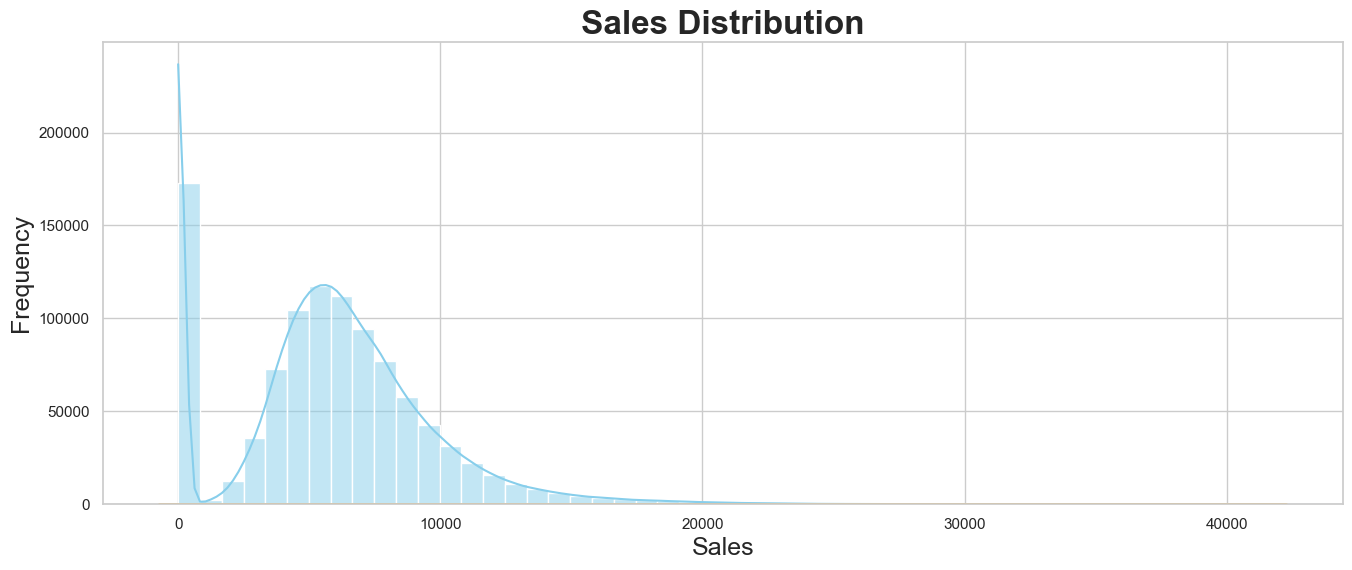

In [451]:

plt.figure(figsize=(16, 6))

#plotting distribution plot with histogram and KDE
sns.histplot(cleaned_df['Sales'], bins=50, kde=True, color='skyblue')

plt.title('Sales Distribution', fontdict={'fontsize': 24, 'fontweight': 'bold'})
plt.xlabel('Sales', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

sns.kdeplot(cleaned_df['Sales'], color='orange', linewidth=2) 

plt.show()

C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\2091225464.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df['Customers']).set_title('Customers Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})


Text(0.5, 1.0, 'Customers Distribution')

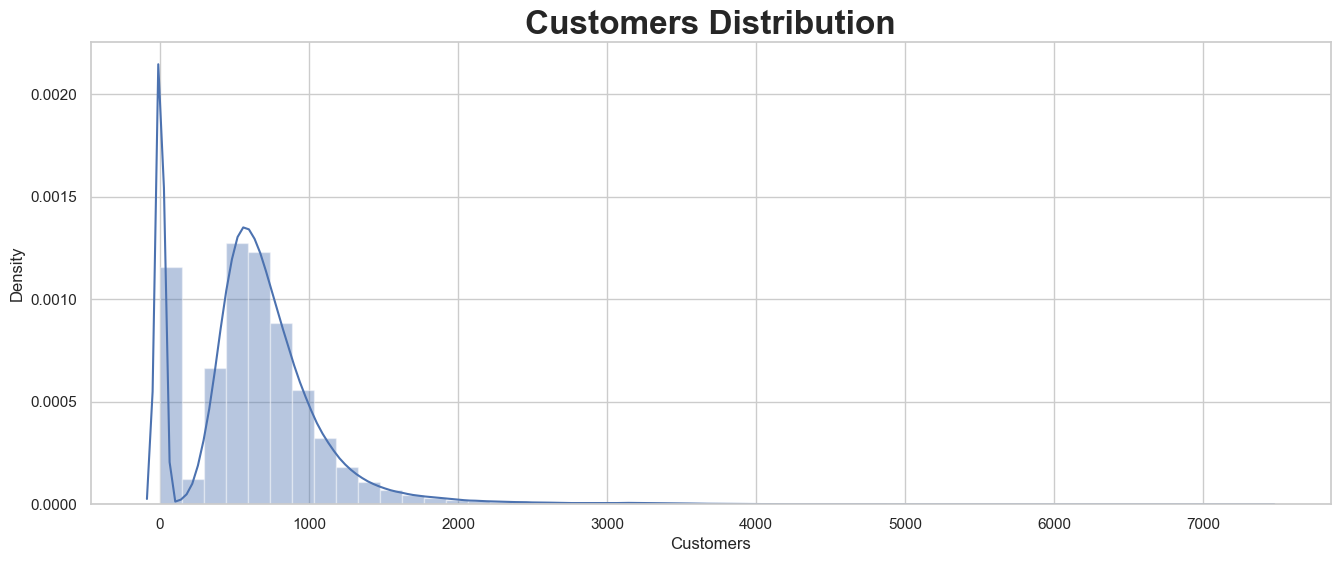

In [452]:
#customer_distribution

plt.figure(figsize=(16, 6))
sns.distplot(cleaned_df['Customers']).set_title('Customers Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

### We can see that there are some outliers in sales and customers distribuiton
### let's check it with boxplot


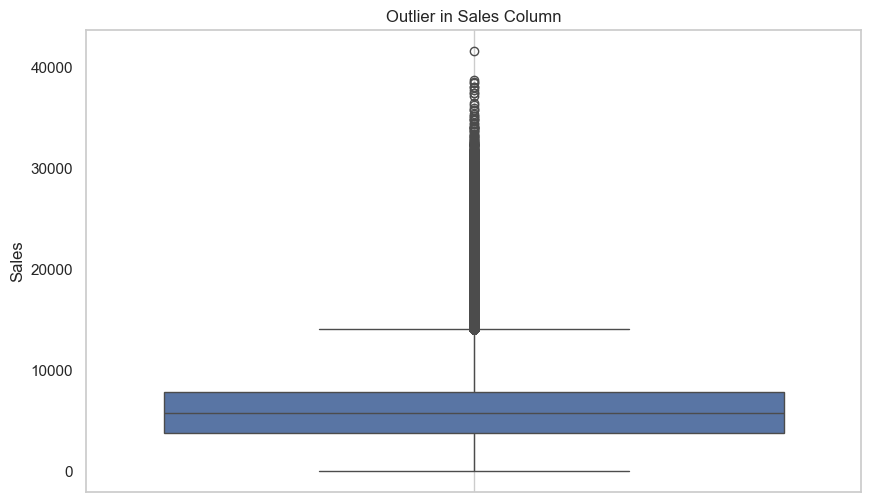

In [453]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=cleaned_df['Sales'])
plt.title('Outlier in Sales Column')
plt.ylabel('Sales')
plt.grid()
plt.show()

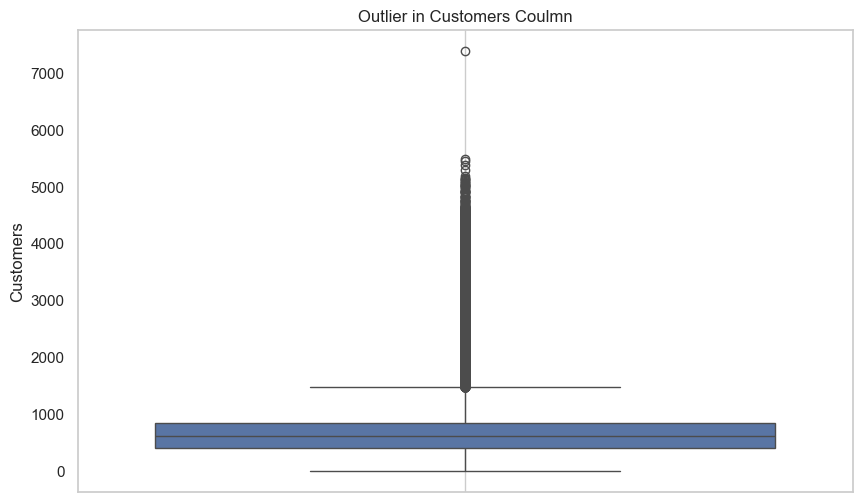

In [454]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=cleaned_df['Customers'])
plt.title('Outlier in Customers Coulmn')
plt.ylabel('Customers')
plt.grid()
plt.show()

2024-11-02 23:07:28,773 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\764580670.py:2: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='linear' for the same effect.
  sns.boxenplot(data=cleaned_df,scale="linear",x="DayOfWeek",y="Sales",color="magenta")
2024-11-02 23:07:29,747 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

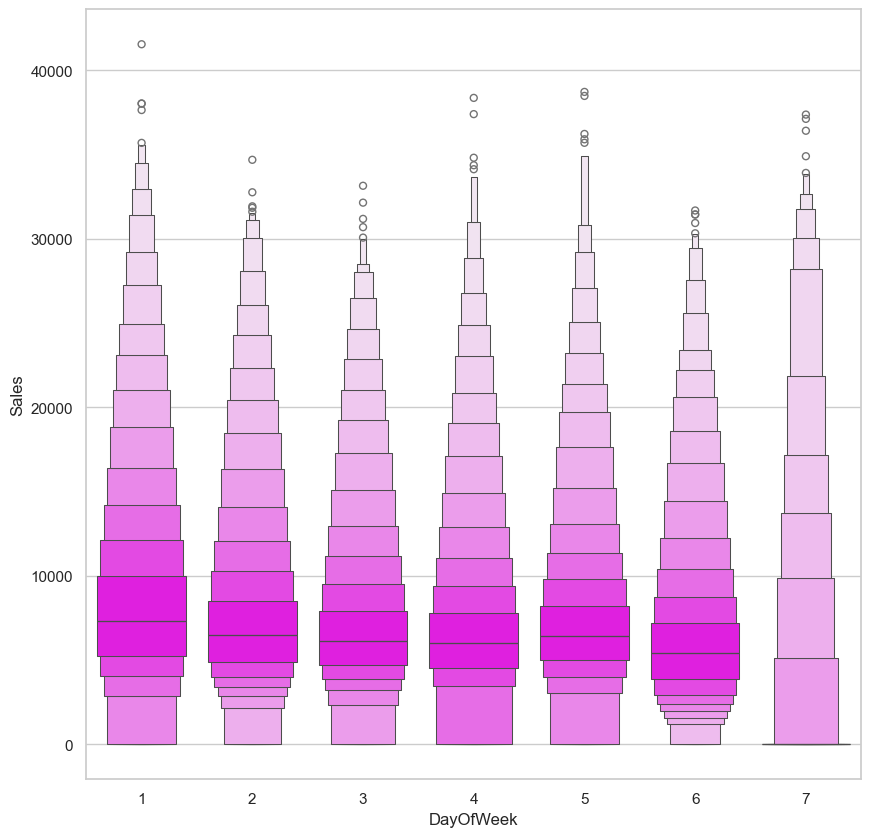

In [455]:
plt.figure(figsize=(10,10))
sns.boxenplot(data=cleaned_df,scale="linear",x="DayOfWeek",y="Sales",color="magenta")

2024-11-02 23:07:32,790 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\2908485860.py:2: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='linear' for the same effect.
  sns.boxenplot(y="Customers", x="DayOfWeek",data=cleaned_df, scale="linear",color="orange")
2024-11-02 23:07:33,778 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='DayOfWeek', ylabel='Customers'>

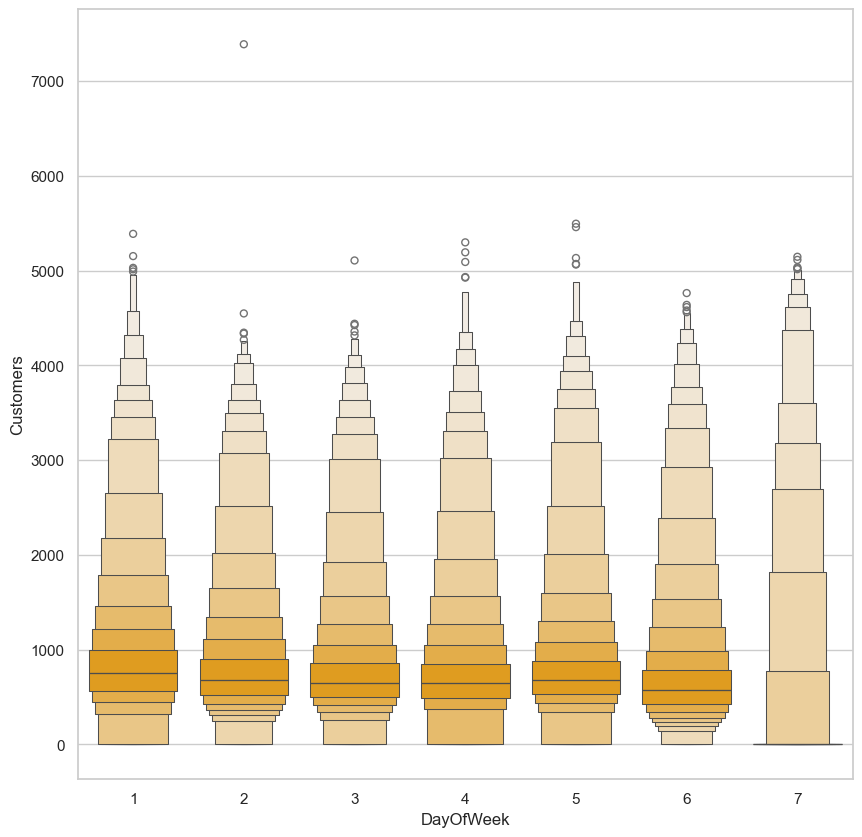

In [456]:
plt.figure(figsize=(10,10))
sns.boxenplot(y="Customers", x="DayOfWeek",data=cleaned_df, scale="linear",color="orange")

This data, contains many outliers, but these might have been caused to the surge of customers during a festival or Holiday, or due to an effective promo. Below we are handle the outliers

#Treating the outliers 

  #a function for replacing outliers with the median, used when there's too many outliers in a feature

In [457]:

def replace_outlier_with_median(dataFrame, feature):
    Q1 = dataFrame[feature].quantile(0.25)
    Q3 = dataFrame[feature].quantile(0.75)
    median = dataFrame[feature].quantile(0.50)

    IQR = Q3 - Q1

    upper_whisker = Q3 + (1.5 * IQR)
    lower_whisker = Q1 - (1.5 * IQR)

    dataFrame[feature] = np.where(dataFrame[feature] > upper_whisker, median, dataFrame[feature])
    dataFrame[feature] = np.where(dataFrame[feature] < lower_whisker, median, dataFrame[feature])

In [458]:
replace_outlier_with_median(cleaned_df, 'Sales')

In [459]:
replace_outlier_with_median(cleaned_df, 'Customers')

# Visual Inspection 

###  DayOfWeek, Open vs closed distribution

In [460]:
def plot_count(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.show()

2024-11-02 23:07:37,297 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\2424852047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')
2024-11-02 23:07:38,537 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


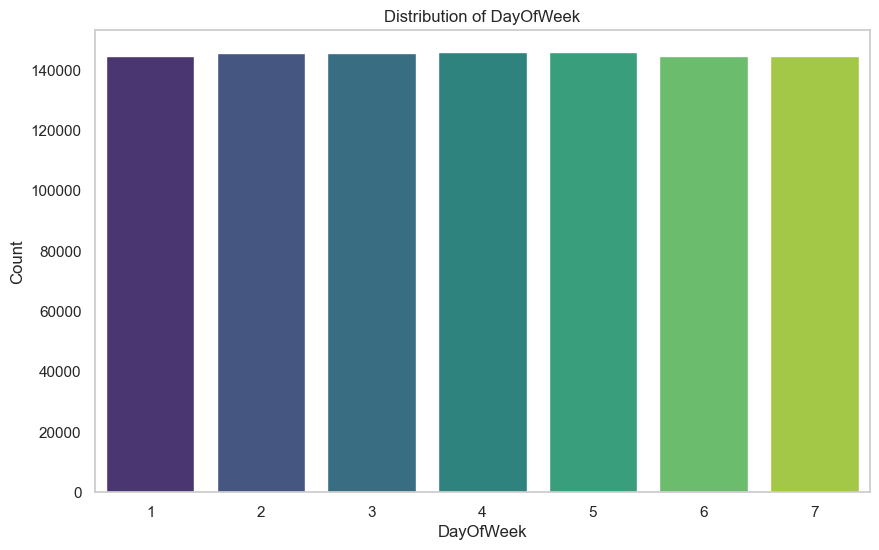

2024-11-02 23:07:42,076 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\2424852047.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')
2024-11-02 23:07:43,377 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


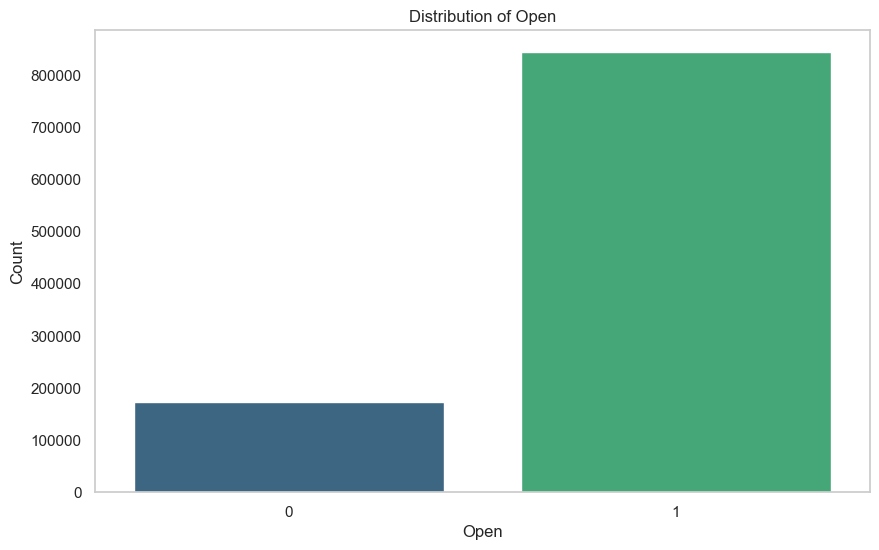

In [461]:
plot_count(cleaned_df, 'DayOfWeek')
plot_count(cleaned_df, 'Open')

### State Holiday School Holidays & Promo 

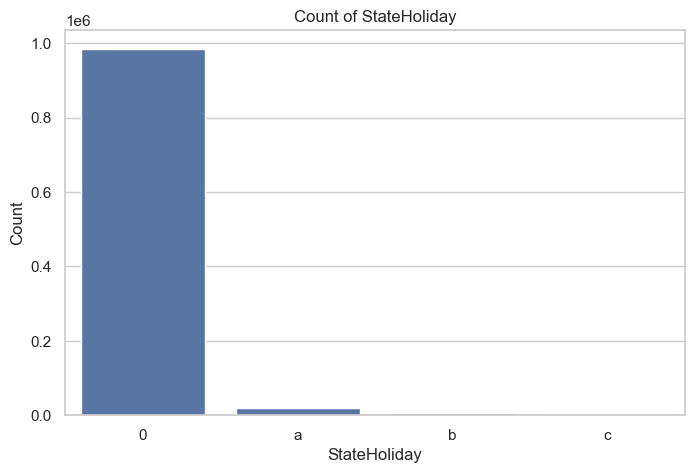

2024-11-02 23:07:50,112 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-02 23:07:51,446 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


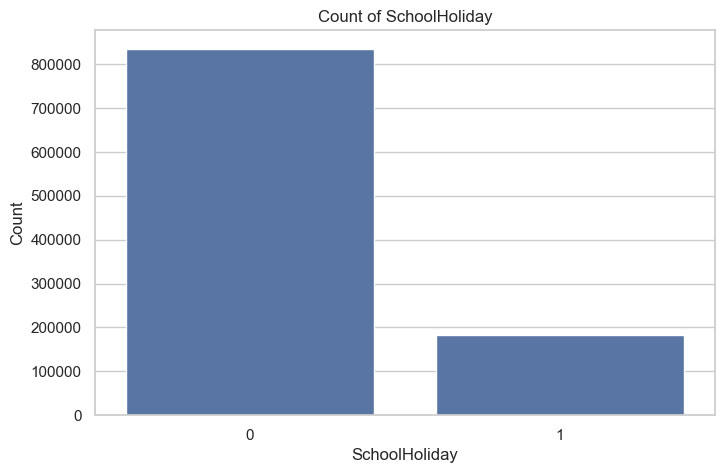

2024-11-02 23:07:54,064 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-02 23:07:55,143 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


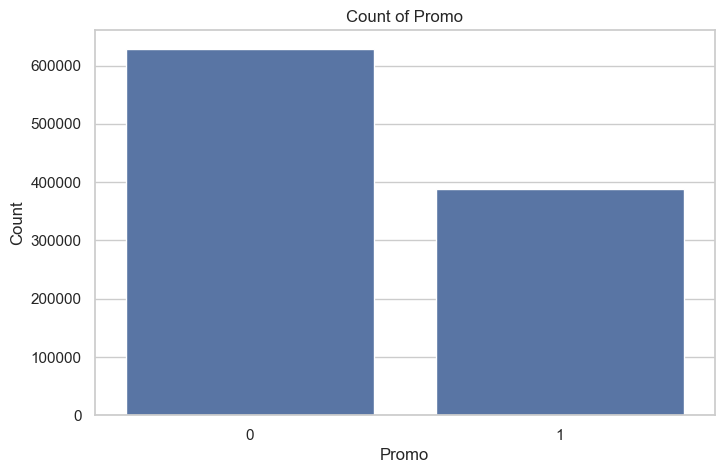

In [462]:
def plot_count(data, column):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=data)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    
    plt.show()

# Plot counts for each category
plot_count(cleaned_df, 'StateHoliday')
plot_count(cleaned_df, 'SchoolHoliday')
plot_count(cleaned_df, 'Promo')

### Store distribution

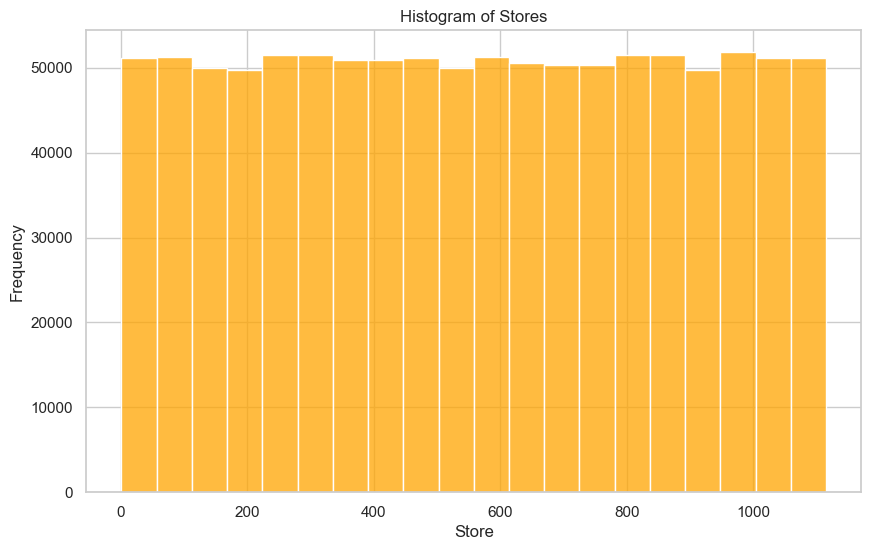

In [463]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['Store'], color='orange', bins=20)  # Adjust the number of bins as needed
plt.title('Histogram of Stores')
plt.xlabel('Store')
plt.ylabel('Frequency')
plt.show()

### Year, Month & WeekOfYear distribution

C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\2444739241.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(counts))  # Get a colormap


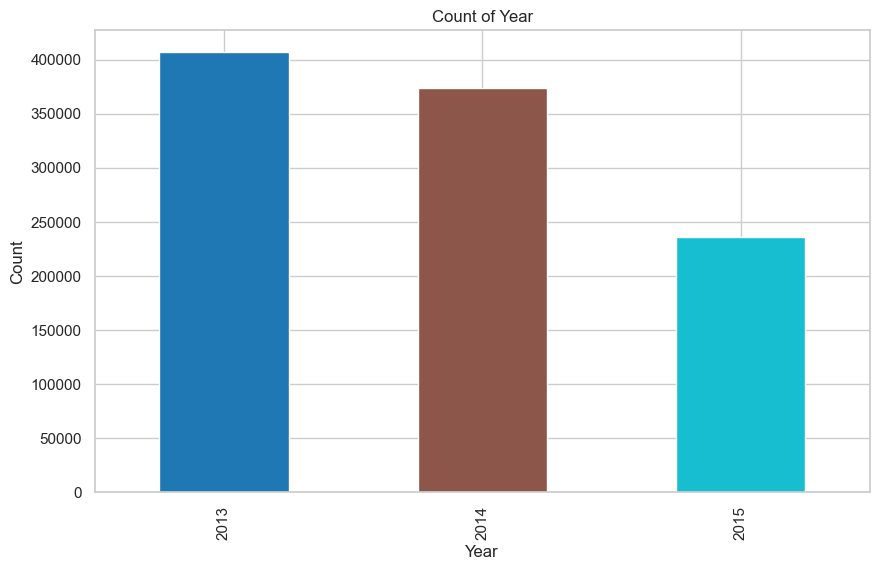

C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\2444739241.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(counts))  # Get a colormap


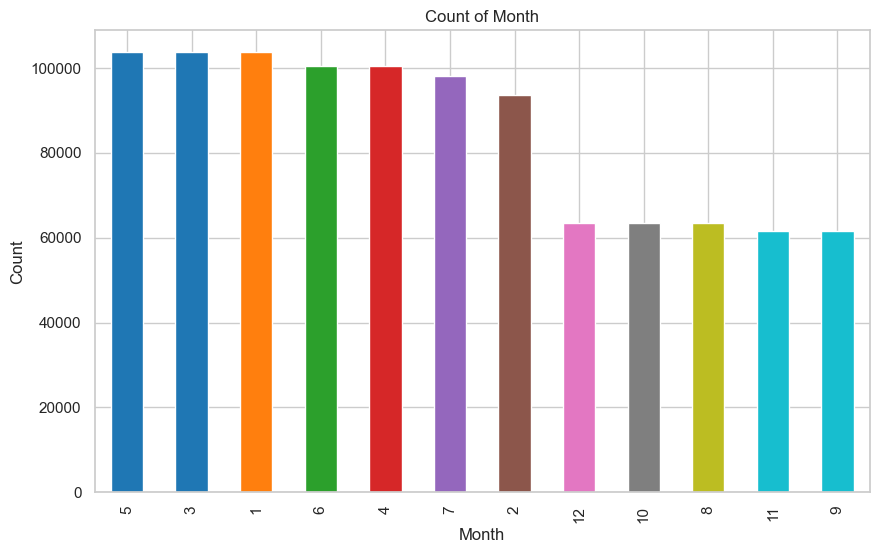

In [464]:
def plot_count(data, column):
    counts = data[column].value_counts()
    plt.figure(figsize=(10, 6))
    colors = plt.cm.get_cmap('tab10', len(counts))  # Get a colormap
    counts.plot(kind='bar', color=colors(range(len(counts))))
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Create count plots for Year, Month
plot_count(cleaned_df, 'Year')
plot_count(cleaned_df, 'Month')

### StoreType, Assortment and Promo2 distribution

C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\773394108.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(counts))  # Get a colormap with enough colors


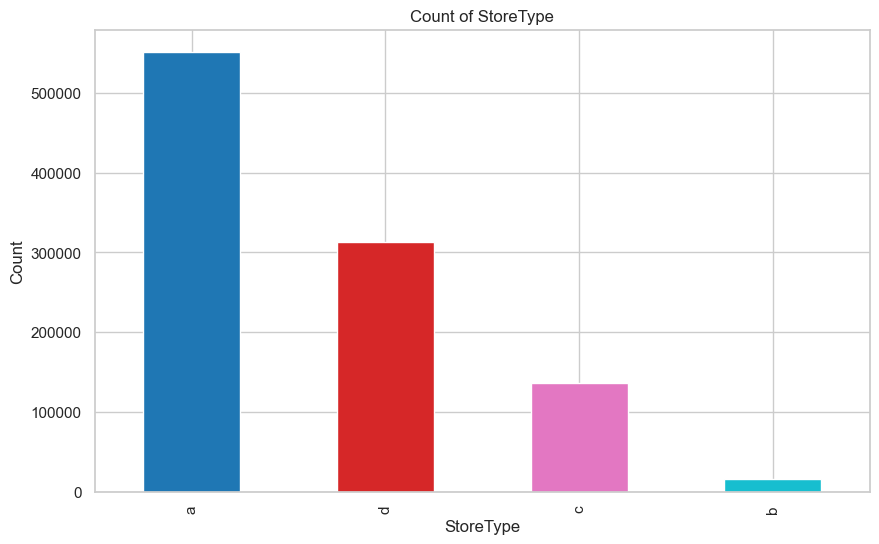

C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\773394108.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(counts))  # Get a colormap with enough colors


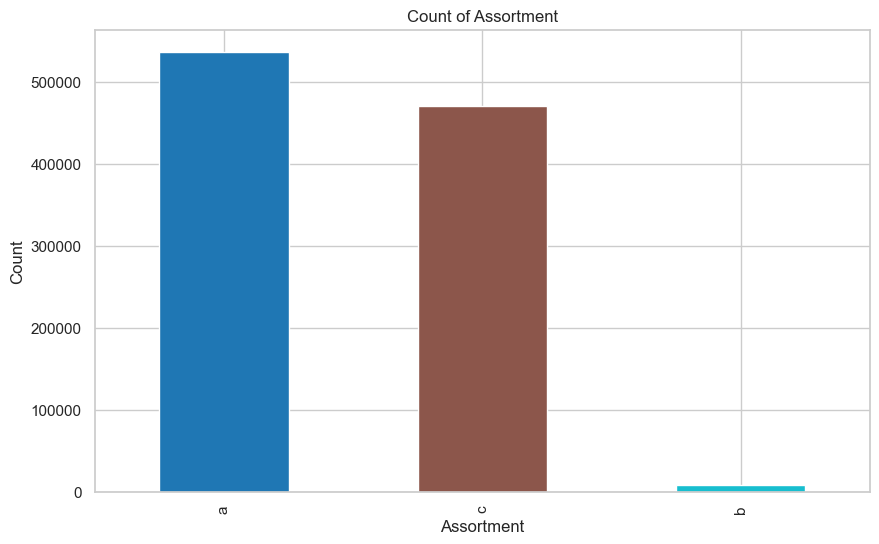

C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\773394108.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(counts))  # Get a colormap with enough colors


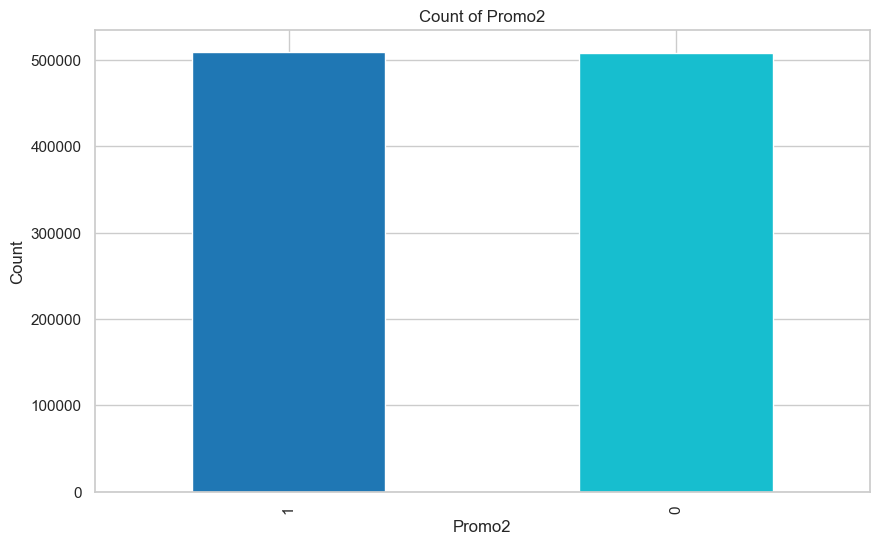

In [465]:
def plot_count(data, column):
    counts = data[column].value_counts()
    plt.figure(figsize=(10, 6))
    colors = plt.cm.get_cmap('tab10', len(counts))  # Get a colormap with enough colors
    counts.plot(kind='bar', color=colors(range(len(counts))))
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    
    plt.show()

# Create count plots for StoreType, Assortment, and Promo2
plot_count(cleaned_df, 'StoreType')
plot_count(cleaned_df, 'Assortment')
plot_count(cleaned_df, 'Promo2')

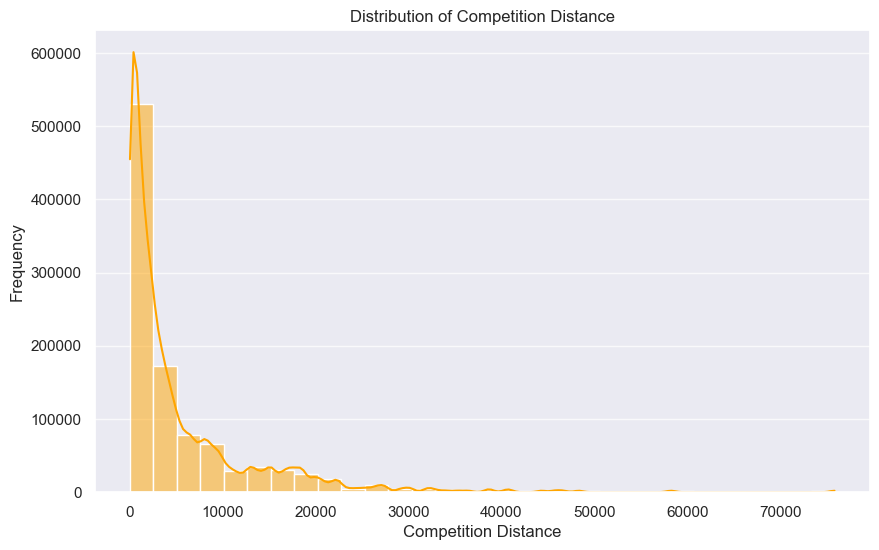

In [466]:
sns.set(style="dark")

plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['CompetitionDistance'], bins=30, color='orange', kde=True)
plt.title('Distribution of Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

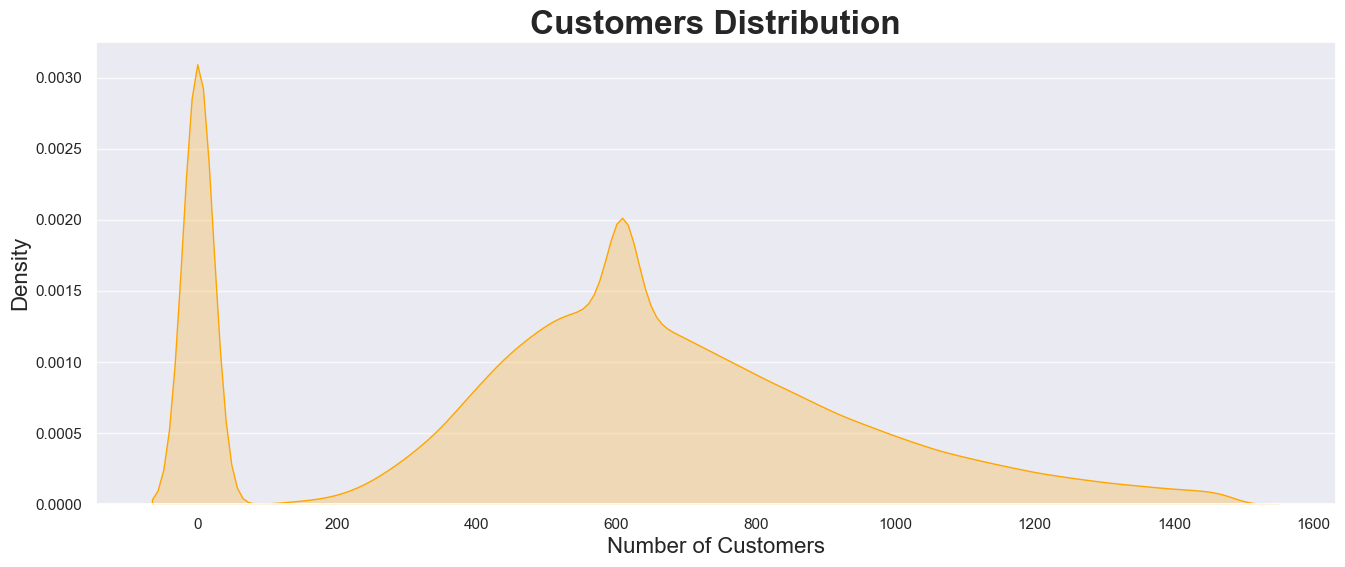

In [467]:
plt.figure(figsize=(16, 6))

sns.kdeplot(cleaned_df['Customers'], color='orange', fill=True)

plt.title('Customers Distribution', fontdict={'fontsize': 24, 'fontweight': 'bold'})
plt.xlabel('Number of Customers', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.grid(axis='y', alpha=0.75)
plt.show()

C:\Users\vipin\AppData\Local\Temp\ipykernel_12848\2047245399.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df['Sales']).set_title('Sales Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})


Text(0.5, 1.0, 'Sales Distribution')

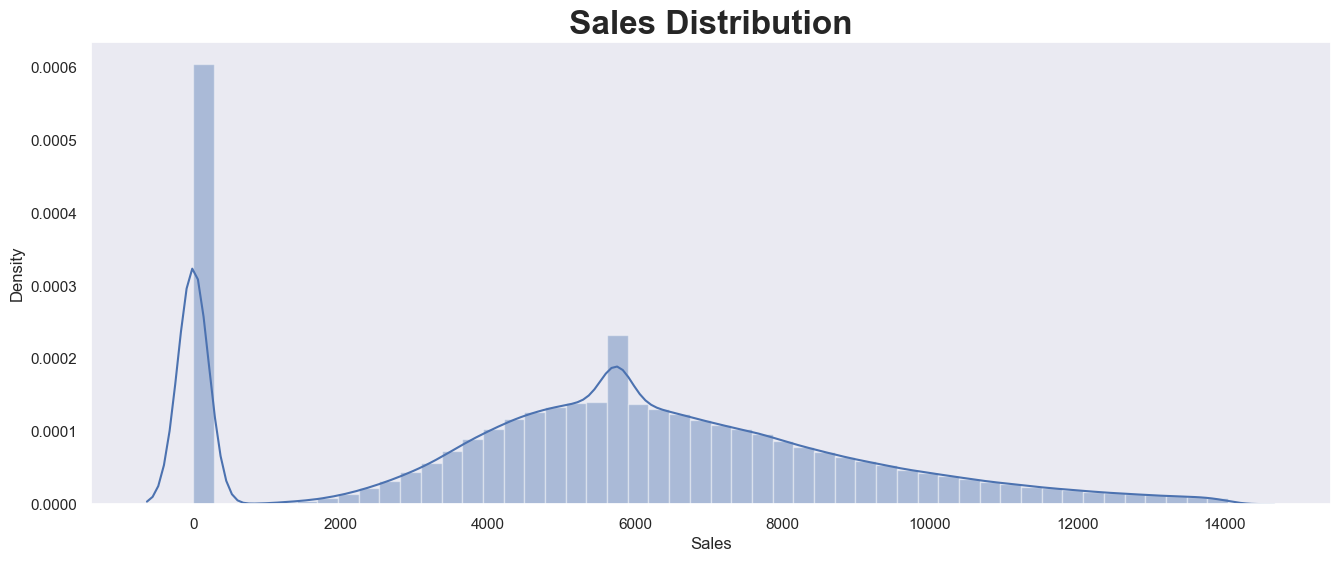

In [468]:
plt.figure(figsize=(16, 6))
sns.distplot(cleaned_df['Sales']).set_title('Sales Distribution',fontdict= { 'fontsize': 24, 'fontweight':'bold'})

__Feature Engeneering__

Generating new features from already existing features.

In [469]:
#Adding salespercustomer column
cleaned_df['SalesperCustomer']=cleaned_df['Sales']/cleaned_df['Customers']

In [470]:
cleaned_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,2,5,6064.0,625.0,1,1,0,1,2015,7,...,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400
2,3,5,8314.0,821.0,1,1,0,1,2015,7,...,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675
3,4,5,13995.0,609.0,1,1,0,1,2015,7,...,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,22.980296
4,5,5,4822.0,559.0,1,1,0,1,2015,7,...,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,8.626118


### correlation Analysis

In [471]:
df_correlation=cleaned_df[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo',
        'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'SalesperCustomer', 'Month', 'Year',
       'StateHoliday', 'Assortment', 'StoreType',
       'PromoInterval']]


In [472]:
# Check the data types of the DataFrame
print(df_correlation.dtypes)


Store                          int64
DayOfWeek                      int64
Sales                        float64
Customers                    float64
Promo                          int64
SchoolHoliday                  int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
SalesperCustomer             float64
Month                          int32
Year                           int32
StateHoliday                  object
Assortment                    object
StoreType                     object
PromoInterval                 object
dtype: object


In [473]:
# Identify non-numeric columns
non_numeric_cols = df_correlation.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: ['StateHoliday', 'Assortment', 'StoreType', 'PromoInterval']


In [474]:
df_cleaned = pd.get_dummies(df_correlation, drop_first=True)

In [475]:
correlation_matrix = df_cleaned.corr()

In [476]:
upper_triangle = np.zeros_like(correlation_matrix, dtype=bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True

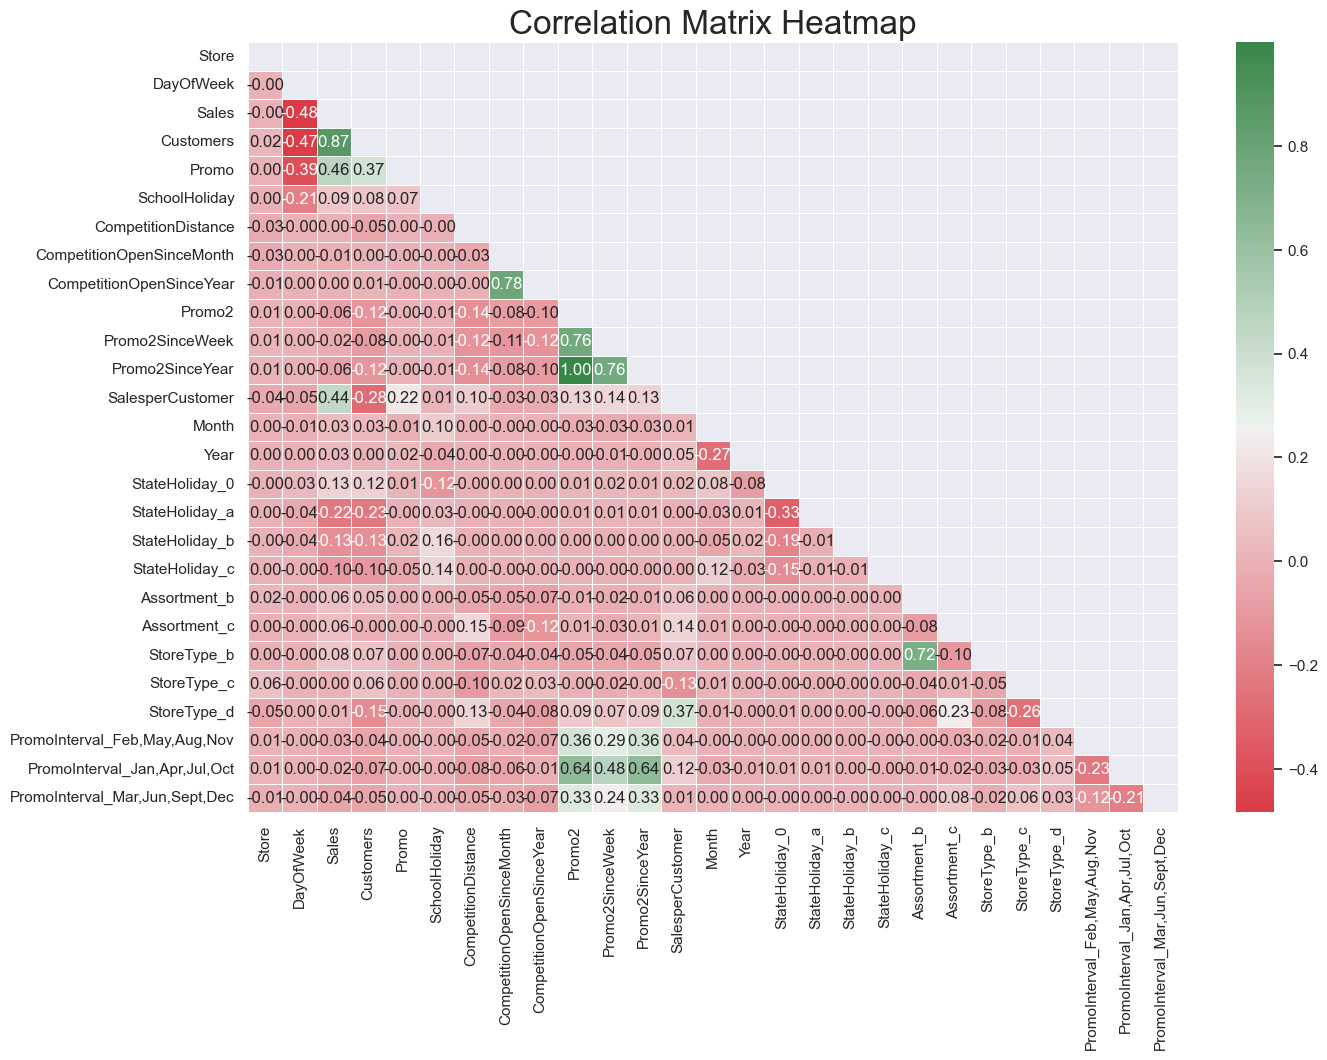

In [477]:
plt.figure(figsize=(15, 10))

sns.heatmap(correlation_matrix, mask=upper_triangle, 
            annot=True, fmt='.2f', linewidths=0.5, 
            cmap=sns.diverging_palette(10, 133, as_cmap=True))

plt.title('Correlation Matrix Heatmap', fontsize=24)
plt.show()

In [478]:
cleaned_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,5263.0,555.0,1,1,0,1,2015,7,...,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,2,5,6064.0,625.0,1,1,0,1,2015,7,...,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400
2,3,5,8314.0,821.0,1,1,0,1,2015,7,...,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675
3,4,5,13995.0,609.0,1,1,0,1,2015,7,...,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,22.980296
4,5,5,4822.0,559.0,1,1,0,1,2015,7,...,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,8.626118


In [479]:
directory = "C:/Users/vipin/OneDrive/Documents/Desktop/Project6"
filename = "clean_df.csv"
full_path = f"{directory}/{filename}"

# Save the DataFrame to a CSV file
cleaned_df.to_csv(full_path, index=False)